<a href="https://colab.research.google.com/github/bismillahkhanhn/AirQuality-Prediction-System/blob/main/Air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install ipywidgets
from IPython.display import display
import ipywidgets as widgets
import joblib
import numpy as np


In [74]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


In [75]:
df = pd.read_csv("/content/city_day.csv")
df.head()


# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])


In [76]:
# Check for nulls
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Drop rows with too many missing values
df = df.dropna(subset=['PM2.5'])   # target column must exist

# Fill remaining NaN with mean values
df = df.fillna(df.mean(numeric_only=True))

# Keep only numeric columns for training
data = df.select_dtypes(include=[np.number])
print("Columns used for ML:", list(data.columns))

features = ['PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
target = 'PM2.5'




City        0
Datetime    0
PM2.5       0
PM10        0
NO          0
NO2         0
NOx         0
NH3         0
CO          0
SO2         0
dtype: int64
Columns used for ML: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


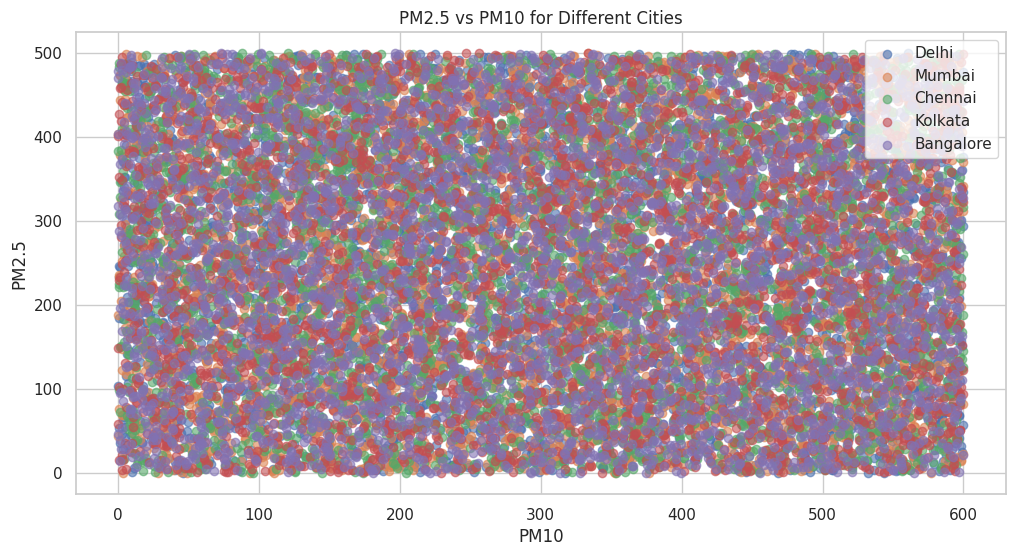

In [77]:
cities = df['City'].unique()
plt.figure(figsize=(12,6))

for city in cities:
    city_data = df[df['City'] == city]
    plt.scatter(city_data['PM10'], city_data['PM2.5'], label=city, alpha=0.6)

plt.xlabel("PM10")
plt.ylabel("PM2.5")
plt.title("PM2.5 vs PM10 for Different Cities")
plt.legend()
plt.show()


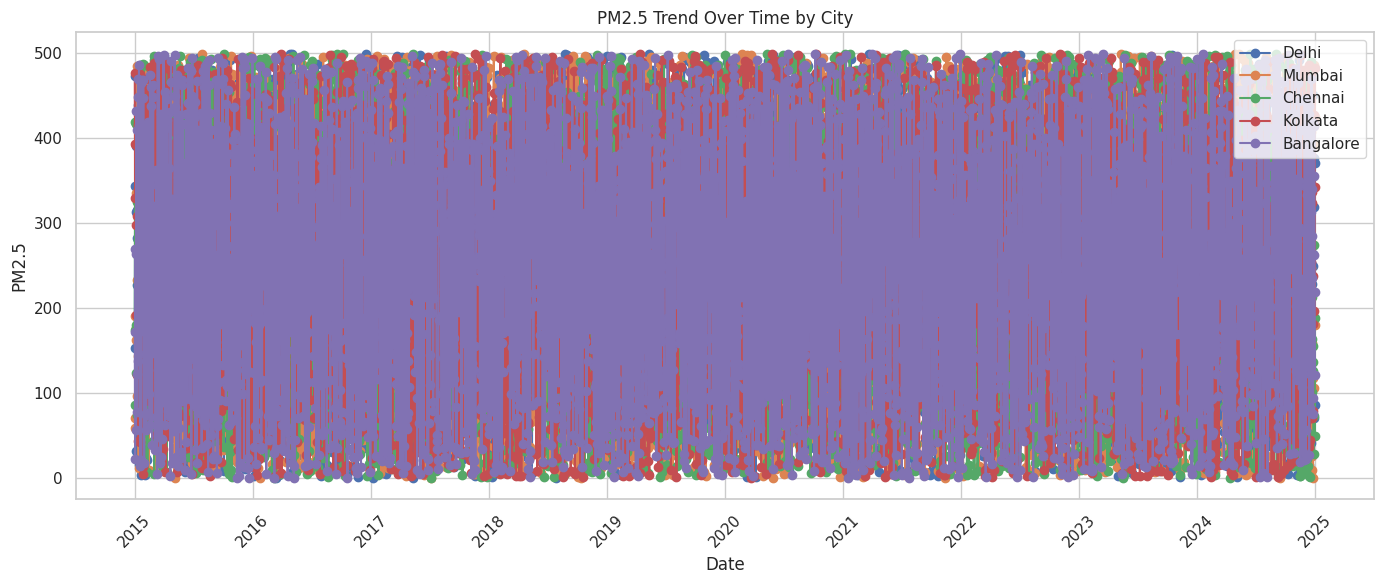

In [78]:
plt.figure(figsize=(14,6))
for city in cities:
    city_data = df[df['City'] == city]
    plt.plot(city_data['Datetime'], city_data['PM2.5'], marker='o', label=city)

plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.title("PM2.5 Trend Over Time by City")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


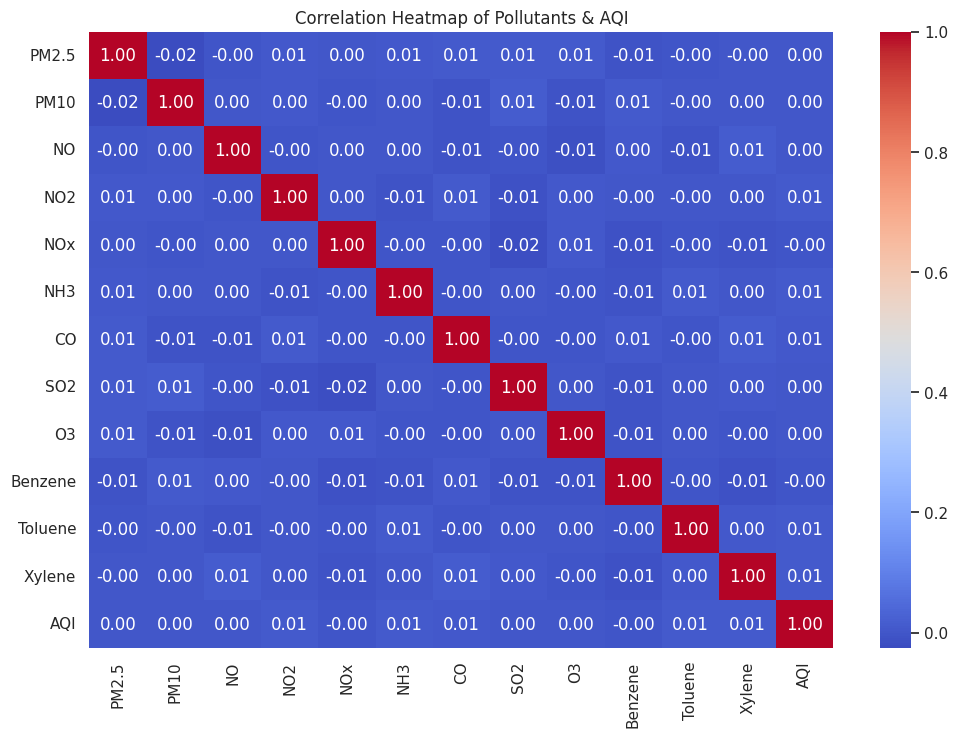

In [79]:
numeric_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']
plt.figure(figsize=(12,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants & AQI")
plt.show()


/tmp/ipython-input-3508348553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='PM2.5', data=avg_pm25, palette='coolwarm')


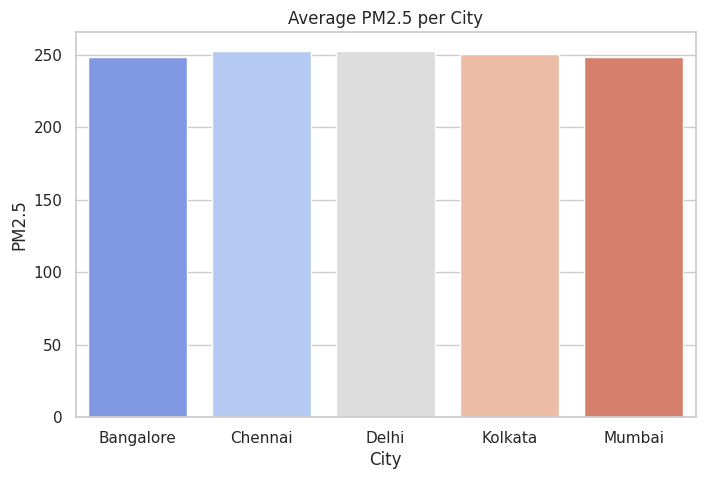

In [80]:
avg_pm25 = df.groupby('City')['PM2.5'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='City', y='PM2.5', data=avg_pm25, palette='coolwarm')
plt.title("Average PM2.5 per City")
plt.ylabel("PM2.5")
plt.show()


In [81]:

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("📘 Linear Regression Performance:")
print(f"R² Score  : {r2_lr:.3f}")
print(f"MAE       : {mae_lr:.2f}")
print(f"RMSE      : {rmse_lr:.2f}")


📘 Linear Regression Performance:
R² Score  : -0.001
MAE       : 124.83
RMSE      : 144.09


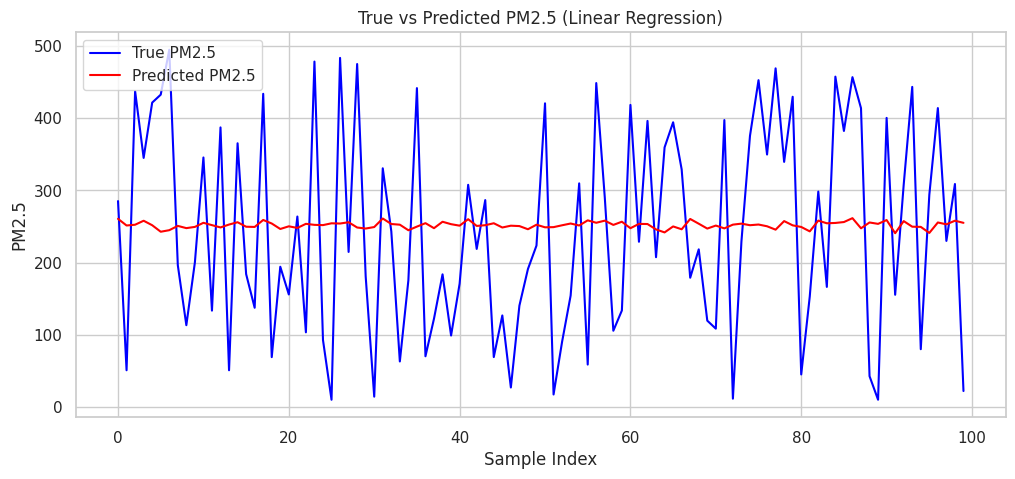

In [83]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label="True PM2.5", color='blue')
plt.plot(y_pred_lr[:100], label="Predicted PM2.5", color='red')
plt.xlabel("Sample Index")
plt.ylabel("PM2.5")
plt.title("True vs Predicted PM2.5 (Linear Regression)")
plt.legend()
plt.show()


In [84]:
import joblib
joblib.dump(lr, "linear_regression_pm25.pkl")


['linear_regression_pm25.pkl']

In [85]:
# Load the Linear Regression model
lr_model = joblib.load("/content/linear_regression_pm25.pkl")
